# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [55]:
# Import essential libraries for data manipulation and analysis

# Import warnings
import warnings  # Suppressing warnings
warnings.filterwarnings('ignore')
# Importing Basic Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib as map  # Plotting utilities
import matplotlib.pyplot as plt  # Plotting library

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [56]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r'/Users/syedmohammadmansoor/Downloads/LR_Delivery_Time_Prediction_SyedMohammadMansoor/porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [57]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [58]:
#look through dataframe columns data and filter categorical and numerical columns
for col in df.columns:
    print(col)
    print(df[col].unique())


market_id
[1. 2. 3. 4. 5. 6.]
created_at
<DatetimeArray>
['2015-02-06 22:24:17', '2015-02-10 21:49:25', '2015-02-16 00:11:35',
 '2015-02-12 03:36:46', '2015-01-27 02:12:36', '2015-02-06 00:42:42',
 '2015-02-08 02:04:17', '2015-01-31 04:35:54', '2015-01-31 02:21:23',
 '2015-01-31 23:45:12',
 ...
 '2015-02-02 17:50:23', '2015-02-10 23:43:08', '2015-01-24 01:33:11',
 '2015-01-29 01:41:57', '2015-01-26 21:25:12', '2015-02-18 02:16:04',
 '2015-02-17 00:19:41', '2015-02-13 00:01:59', '2015-01-24 04:46:08',
 '2015-02-01 18:18:15']
Length: 162649, dtype: datetime64[ns]
actual_delivery_time
<DatetimeArray>
['2015-02-06 23:11:17', '2015-02-10 22:33:25', '2015-02-16 01:06:35',
 '2015-02-12 04:35:46', '2015-01-27 02:58:36', '2015-02-06 01:38:42',
 '2015-02-08 03:07:17', '2015-01-31 05:33:54', '2015-01-31 02:58:23',
 '2015-02-01 00:26:12',
 ...
 '2015-01-24 02:09:11', '2015-02-03 03:05:26', '2015-02-07 04:00:16',
 '2015-01-29 02:36:57', '2015-01-30 21:40:23', '2015-01-26 22:10:12',
 '2015-02-17 01:

In [59]:
# Convert categorical features to category type
# I have chosen 'store_primary_category', 'order_protocol', 'market_id' as categorical
# because these columns likely contains IDs or labels 
categorical_cols = ['store_primary_category', 'order_protocol', 'market_id']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify the changes
print(df.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [61]:
# Calculate time taken in minutes
df['time_taken'] = ((df['actual_delivery_time'] - df['created_at']).dt.seconds)/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [62]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at_hour'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.weekday >= 5
df['isWeekend'] = df['isWeekend'].astype('category')


In [63]:
# Drop unnecessary columns
#I have extracted hour and day from 'created_at' and 'actual_delivery_time'
# we might not need the full timestamp
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [64]:
# Define target variable (y) and features (X)
# time_taken is target variable (y) as it represents the estimated delivery time
X = df[['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_at_hour',
       'isWeekend']]
y = df['time_taken']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [65]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=42)

# Display dataset sizes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(140621, 14) (35156, 14) (140621,) (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [66]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
numerical_cols = list(set(X.columns) - set(categorical_cols))

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

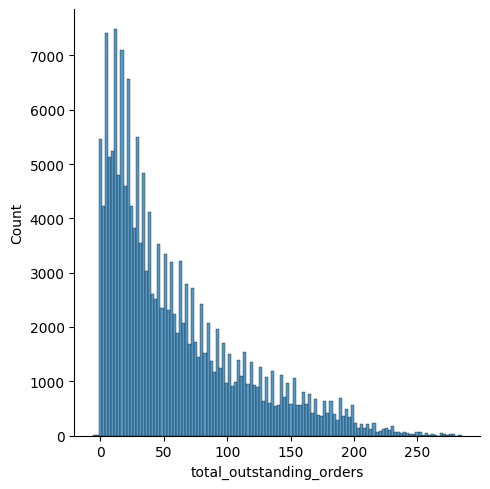

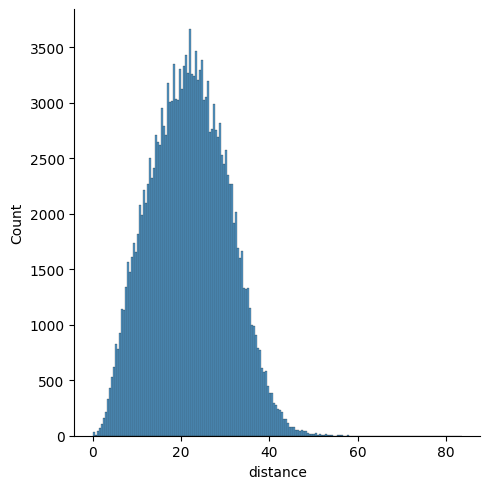

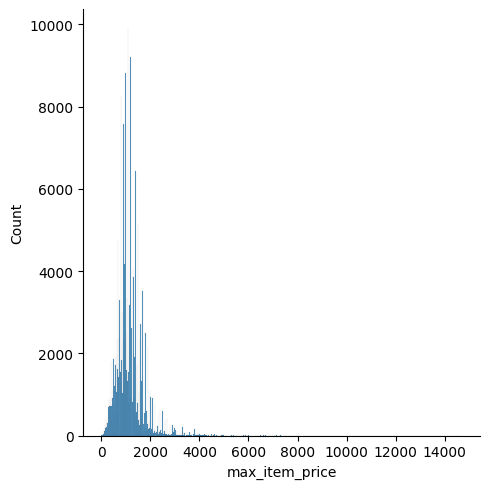

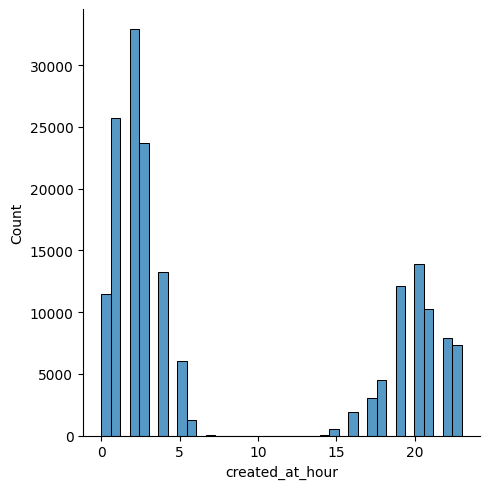

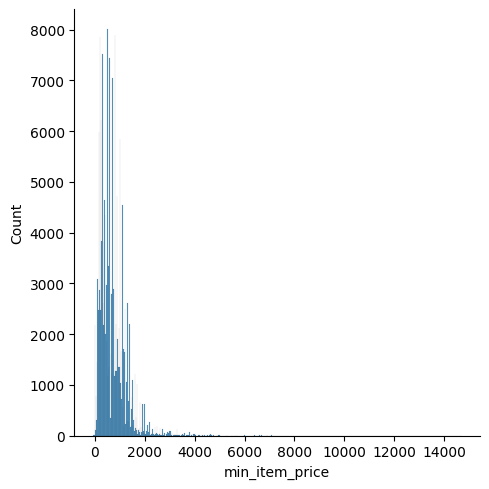

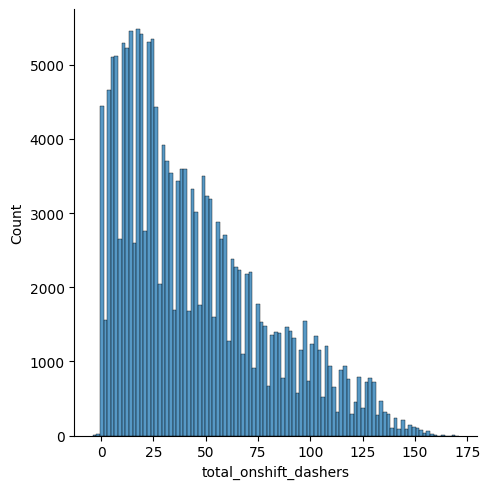

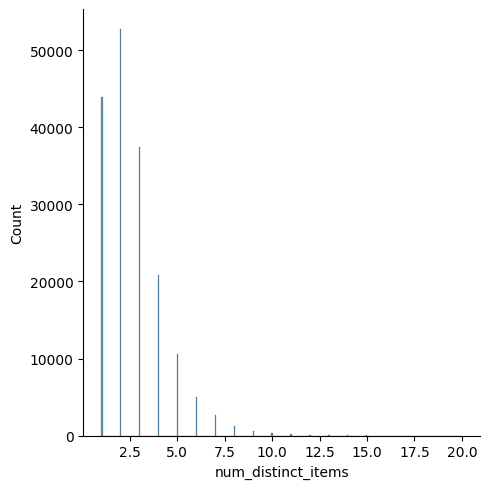

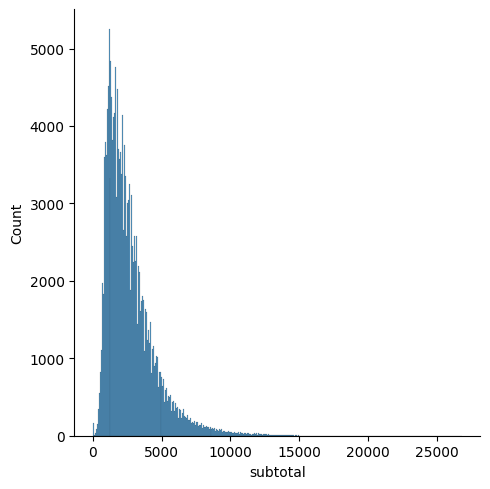

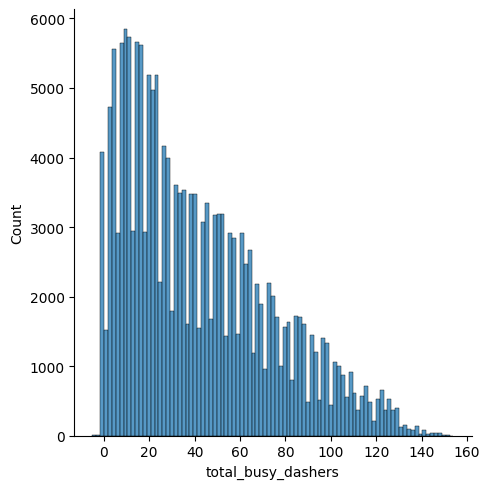

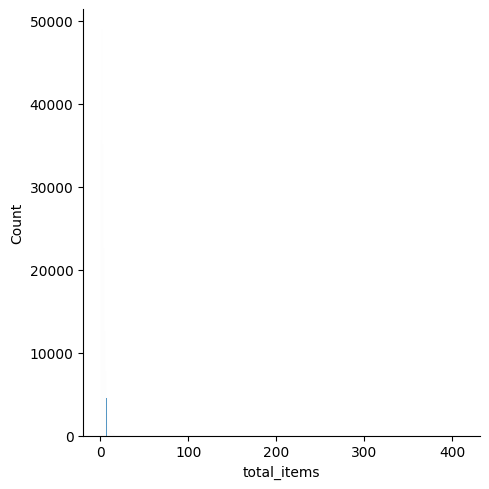

In [67]:
# Plot distributions for all numerical columns

for i in range(len(numerical_cols)):
    sns.displot(df[numerical_cols[i]])
plt.show()

In [69]:
from scipy.stats import skew
import numpy as np

# Step 1: Compute skewness of numerical features
skewness_values = {feature: skew(X_train[feature]) for feature in numerical_cols}

# Step 2: Identify skewed features
skewed_features = {feature: value for feature, value in skewness_values.items() if abs(value) > 0.5}

# Step 3: Apply appropriate transformation
for feature, skew_value in skewed_features.items():
    if skew_value > 1:  # Highly skewed
        X_train[feature] = np.log1p(X_train[feature])  # Log transformation
        X_test[feature] = np.log1p(X_test[feature])
    elif 0.5 < skew_value <= 1:  # Moderately skewed
        X_train[feature] = np.sqrt(X_train[feature])
        X_test[feature] = np.sqrt(X_test[feature])

# Step 4: Print transformed features
print("Transformed features for skewness correction:", list(skewed_features.keys()))



Transformed features for skewness correction: ['total_outstanding_orders', 'max_item_price', 'created_at_hour', 'min_item_price', 'total_onshift_dashers', 'num_distinct_items', 'subtotal', 'total_busy_dashers', 'total_items']


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

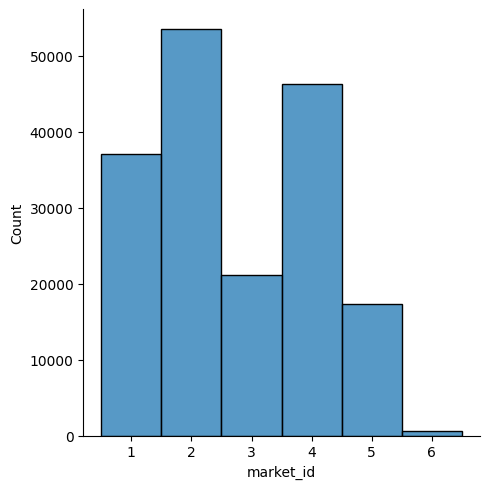

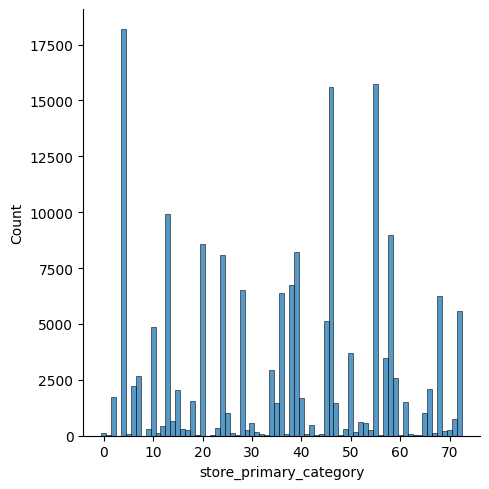

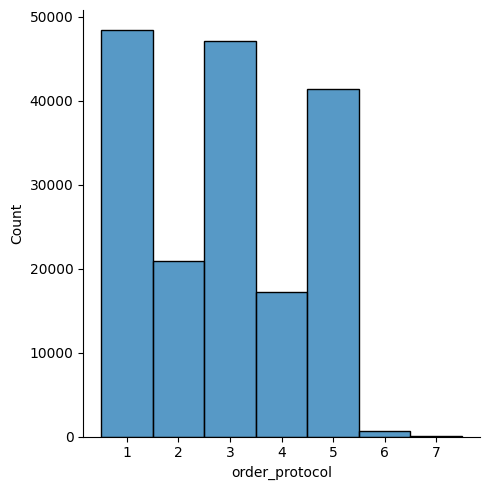

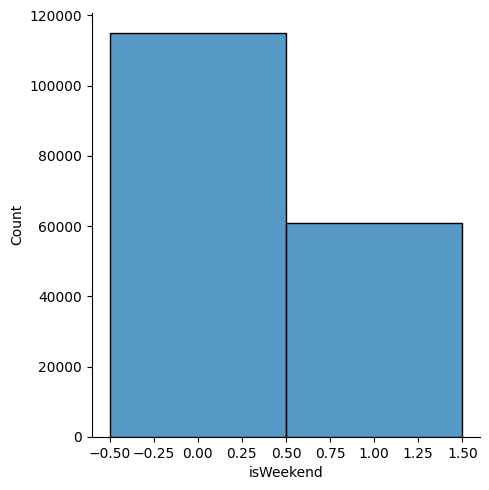

In [20]:
# Distribution of categorical columns
for i in range(len(categorical_cols)):
    sns.displot(df[categorical_cols[i]])
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

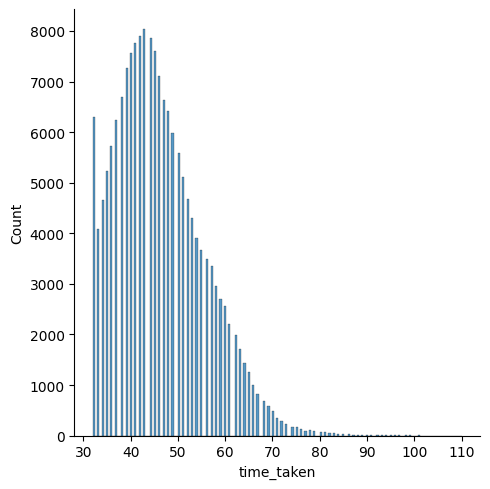

In [21]:
# Distribution of time_taken

sns.displot(df['time_taken'])
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

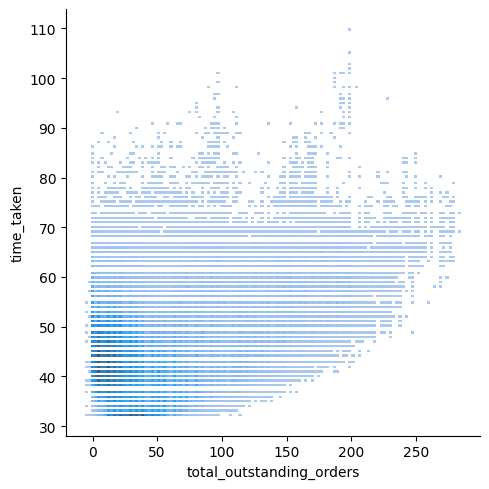

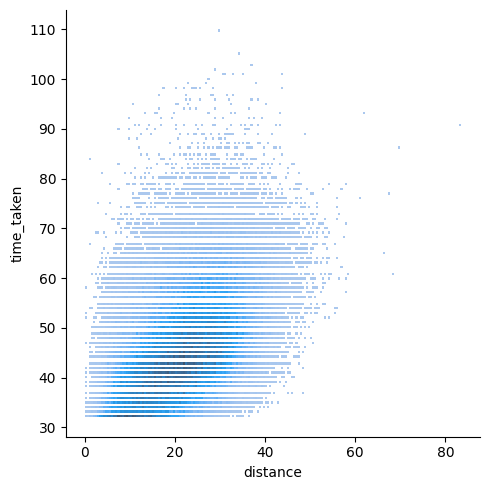

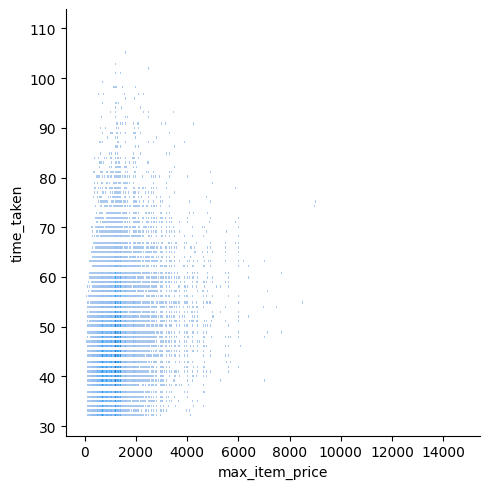

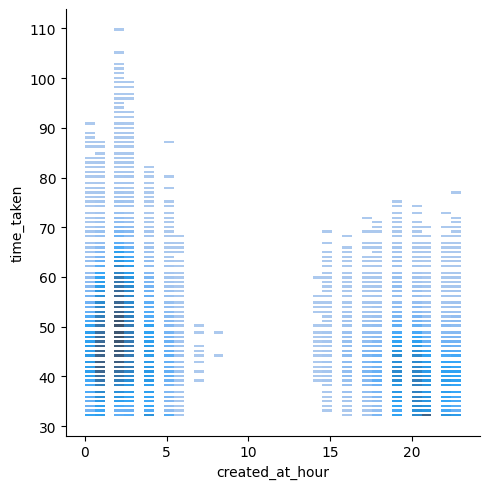

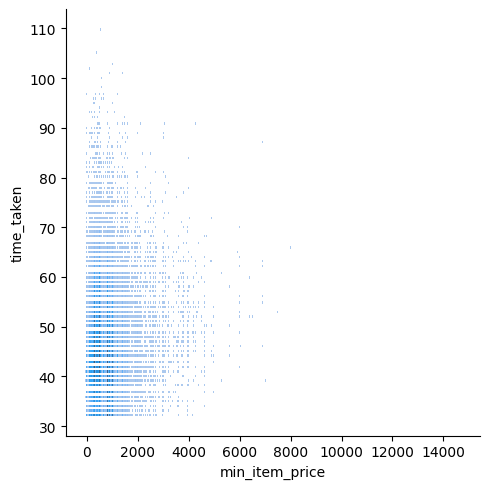

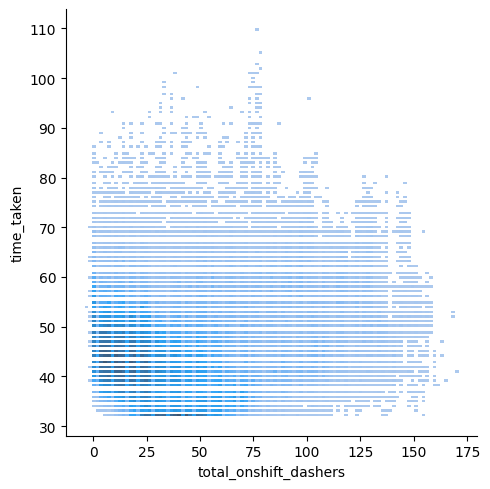

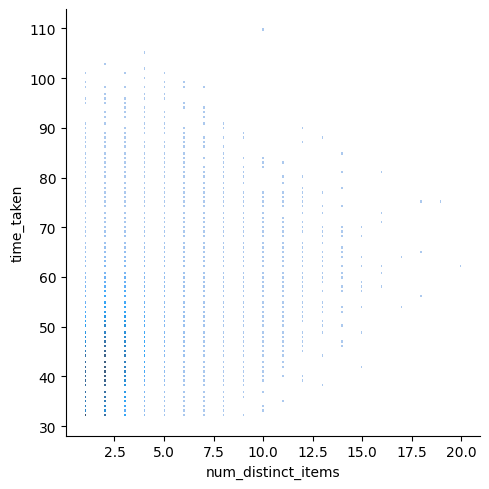

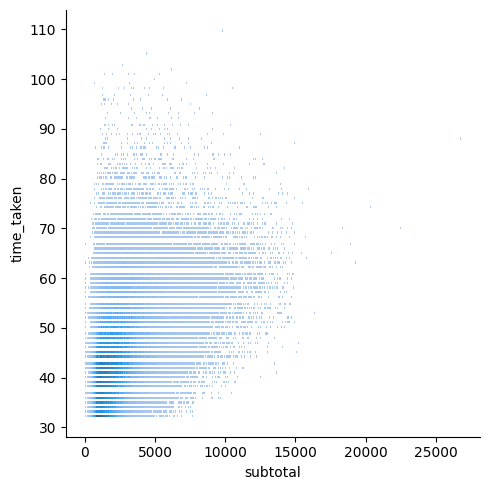

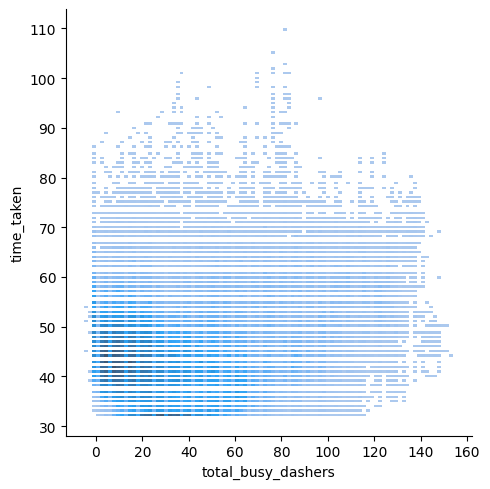

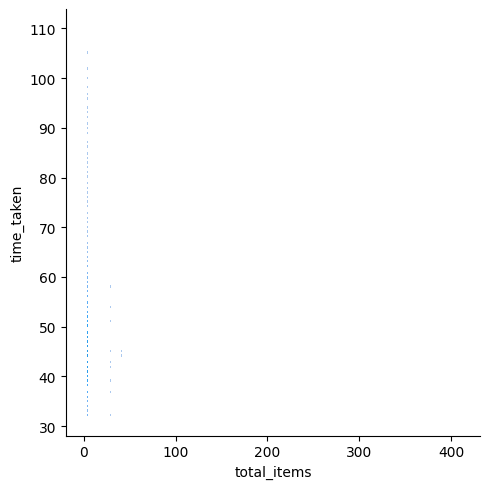

In [71]:
# Scatter plot to visualise the relationship between time_taken and other features

for i in range(len(numerical_cols)):
    sns.displot(x=df[numerical_cols[i]],y=df['time_taken'])
plt.show()

# Scatter Plot Insights
# Positive correlation: distance, total_outstanding_orders, and subtotal show an increasing trend with time_taken, meaning longer distances or higher orders increase delivery time.

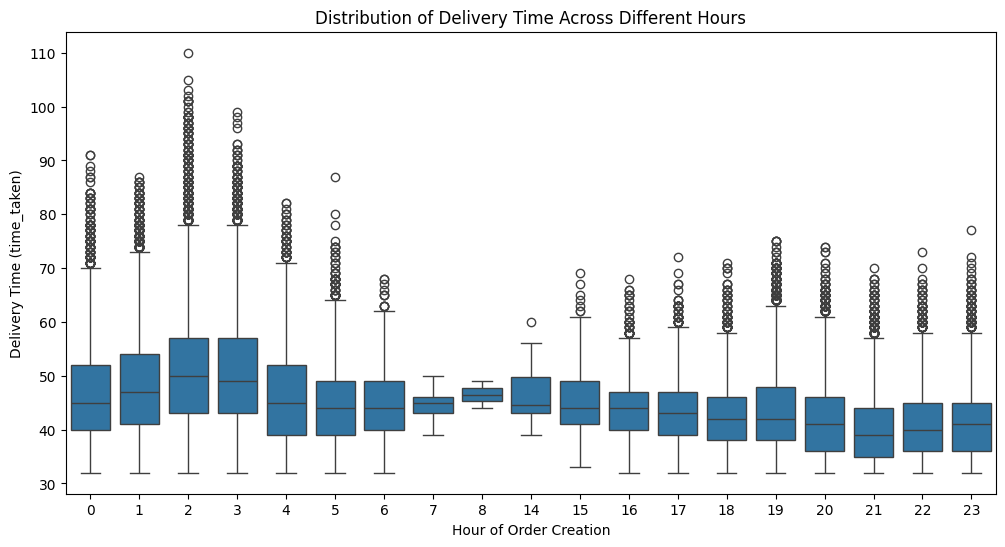

In [24]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["created_at_hour"], y=df["time_taken"])
plt.xlabel("Hour of Order Creation")
plt.ylabel("Delivery Time (time_taken)")
plt.title("Distribution of Delivery Time Across Different Hours")
# plt.xticks(rotation=45)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

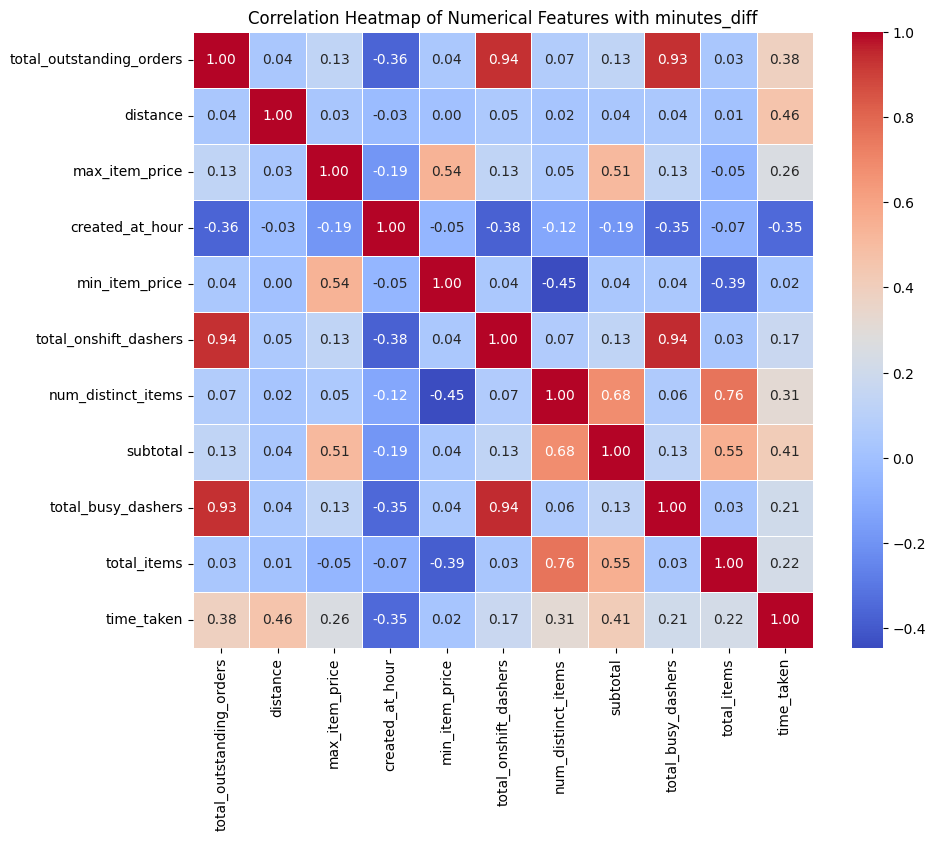

In [25]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols + ["time_taken"]].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features with minutes_diff")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [26]:
# Drop 3-5 weakly correlated columns from training dataset

# To drop 3-5 weakly correlated columns from the training dataset, follow these steps:

# Compute the correlation of each feature with time_taken.
# Identify the least correlated features (absolute correlation close to 0).
# Drop those columns from X_train and X_test.

# Compute correlation with target variable
correlation_matrix = df.corr()
weakest_features = correlation_matrix["time_taken"].abs().nsmallest(5).index.tolist()

# Drop weakly correlated features
X_train = X_train.drop(columns=weakest_features)
X_test = X_test.drop(columns=weakest_features)

# Display dropped features
print("Dropped weakly correlated features:", weakest_features)

Dropped weakly correlated features: ['min_item_price', 'store_primary_category', 'market_id', 'isWeekend', 'order_protocol']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

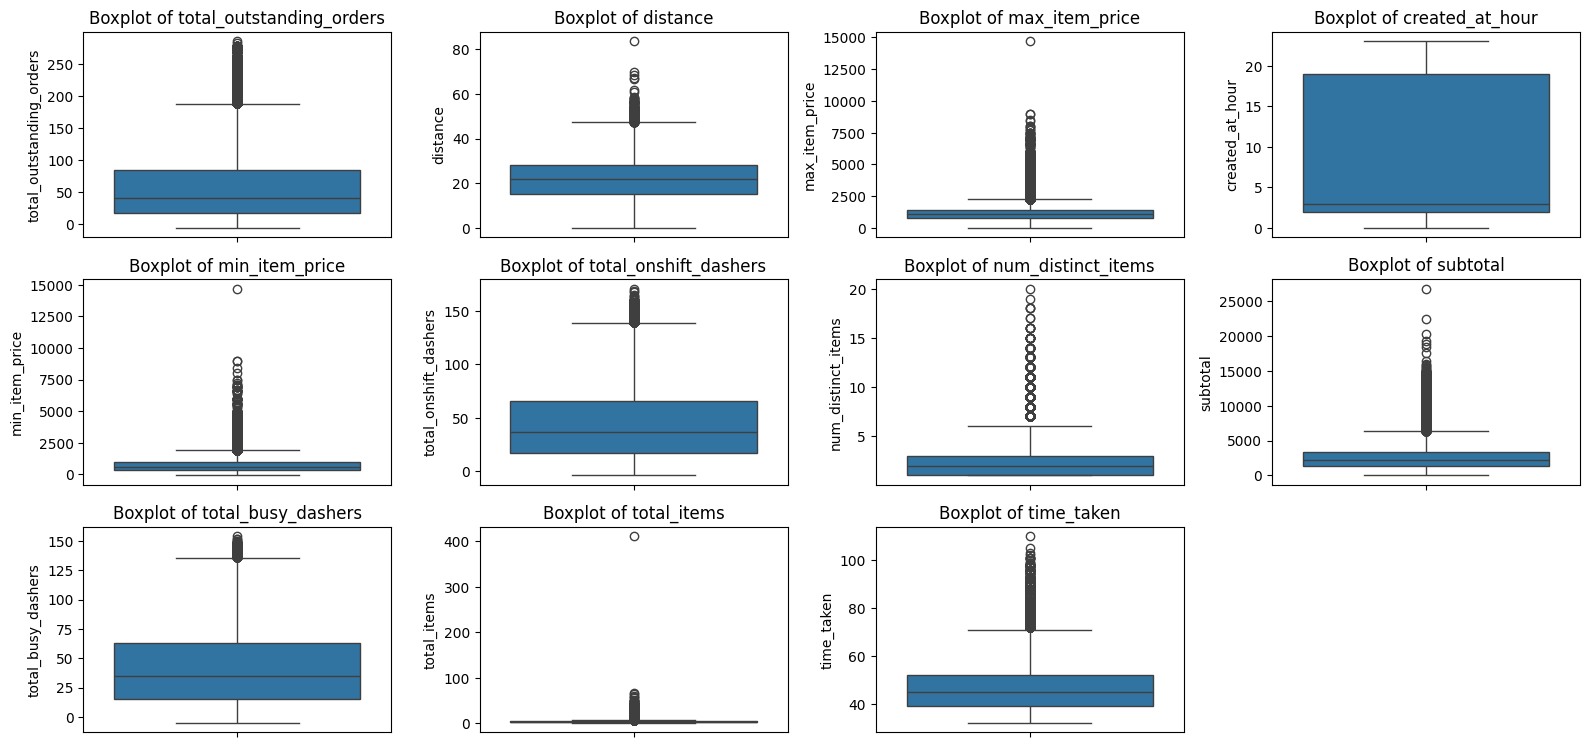

In [27]:
# Boxplot for time_taken

plt.figure(figsize=(16, 10))

# Plot boxplots for each numerical feature
for i, col in enumerate(numerical_cols + ["time_taken"]):  
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [28]:
# Handle outliers

# Function to cap outliers using IQR method
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Apply to numerical columns
df = cap_outliers(df, numerical_cols + ["time_taken"])

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [31]:
# Import libraries

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [30]:
# Apply scaling to the numerical columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [32]:
# Create/Initialise the model
# Add constant term to features (Intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [34]:
# Train the model using the training data
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 9.445e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:49:27   Log-Likelihood:            -3.7615e+05
No. Observations:              140621   AIC:                         7.523e+05
Df Residuals:                  140611   BIC:                         7.524e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# Make predictions
# Predict using Statsmodels
y_pred_sm = model_sm.predict(X_test_sm)

In [36]:
# Find results for evaluation metrics
mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)
print(f"Statsmodels - MSE: {mse_sm}, R²: {r2_sm}")


Statsmodels - MSE: 12.399539100474557, R²: 0.8583351553600614


In [37]:
#Alternative 2- Linear regression model using sklearn model

# Initialize the model
model_sk = LinearRegression()

# Train model
model_sk.fit(X_train, y_train)

# Predict using Scikit-learn
y_pred_sk = model_sk.predict(X_test)

# Evaluate Model
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)
print(f"Scikit-learn - MSE: {mse_sk}, R²: {r2_sk}")

Scikit-learn - MSE: 12.399539100474547, R²: 0.8583351553600616


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

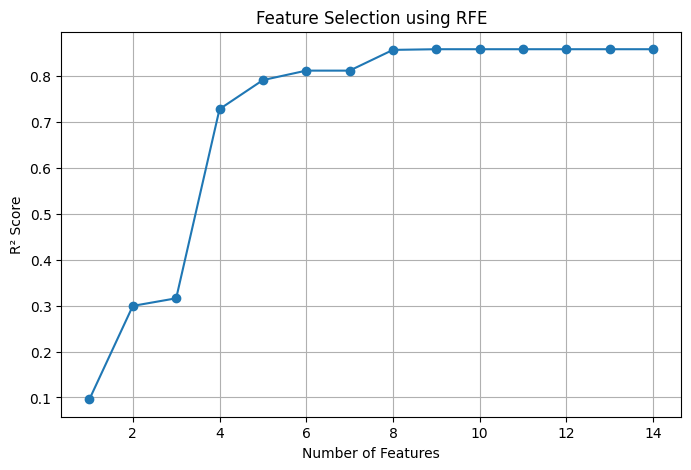

In [43]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

num_features = list(range(1, len(X.columns) + 1))
r2_scores = []

for n in num_features:
    # Run RFE with 'n' features
    rfe = RFE(estimator=model_sk, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    
    # Select features
    selected_features = X_train.columns[rfe.support_]
    
    # Train new model with selected features
    model_sk.fit(X_train[selected_features], y_train)
    y_pred = model_sk.predict(X_test[selected_features])
    
    # Calculate R² score
    r2_scores.append(r2_score(y_test, y_pred))

# Plot feature count vs. R² score
plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("Feature Selection using RFE")
plt.grid(True)
plt.show()


In [44]:
# Build the final model with selected number of features

rfe = RFE(estimator=model_sk, n_features_to_select=8)  # Select the top 8 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected Features:", selected_features)

# Step 6: Train the model with selected features
model_sk.fit(X_train_rfe, y_train)

# Step 7: Make Predictions
y_pred = model_sk.predict(X_test_rfe)

# Step 8: Evaluate Performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print("\nModel Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")

evaluate_model(y_test, y_pred)

# Step 9: Make Predictions on New Data
new_data = np.array([X_test_rfe[0]])  # Example: Use the first test sample
predicted_time = model_sk.predict(new_data)
print(f"\nPredicted Delivery Time: {predicted_time[0]:.2f} minutes")


Selected Features: ['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers']

Model Performance:
Mean Absolute Error (MAE): 2.5866091052317386
Mean Squared Error (MSE): 12.524823246696721
Root Mean Squared Error (RMSE): 3.539042702016567
R² Score: 0.8569037828738267

Predicted Delivery Time: 48.86 minutes


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

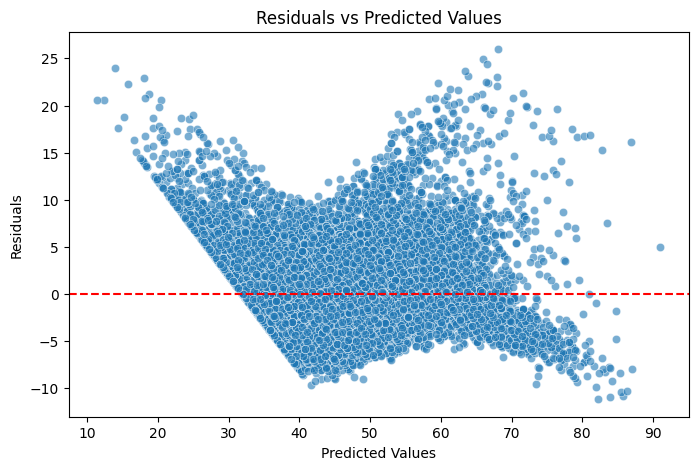

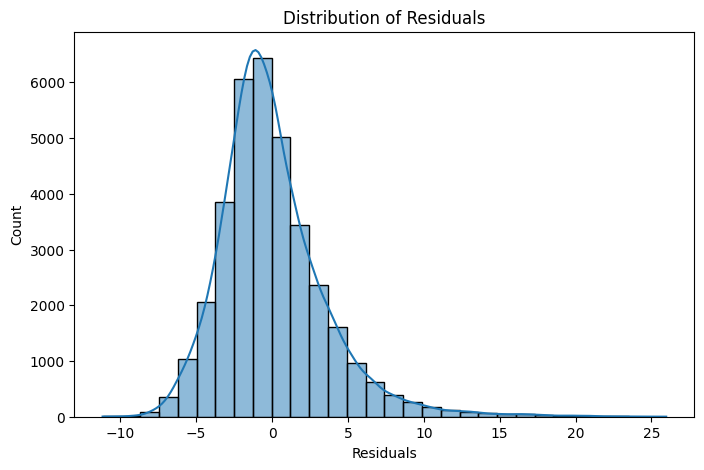

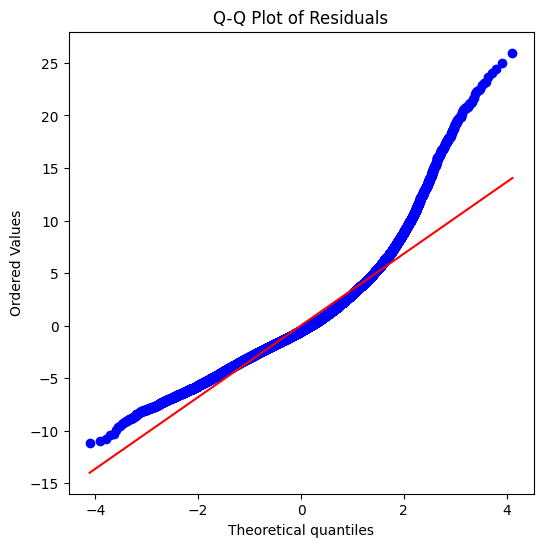

In [45]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import scipy.stats as stats

# Step 1: Compute residuals
residuals = y_test - y_pred

# Step 2: Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Step 3: Histogram of Residuals (Checking Normality)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Step 4: Q-Q Plot (Checking Normality)
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


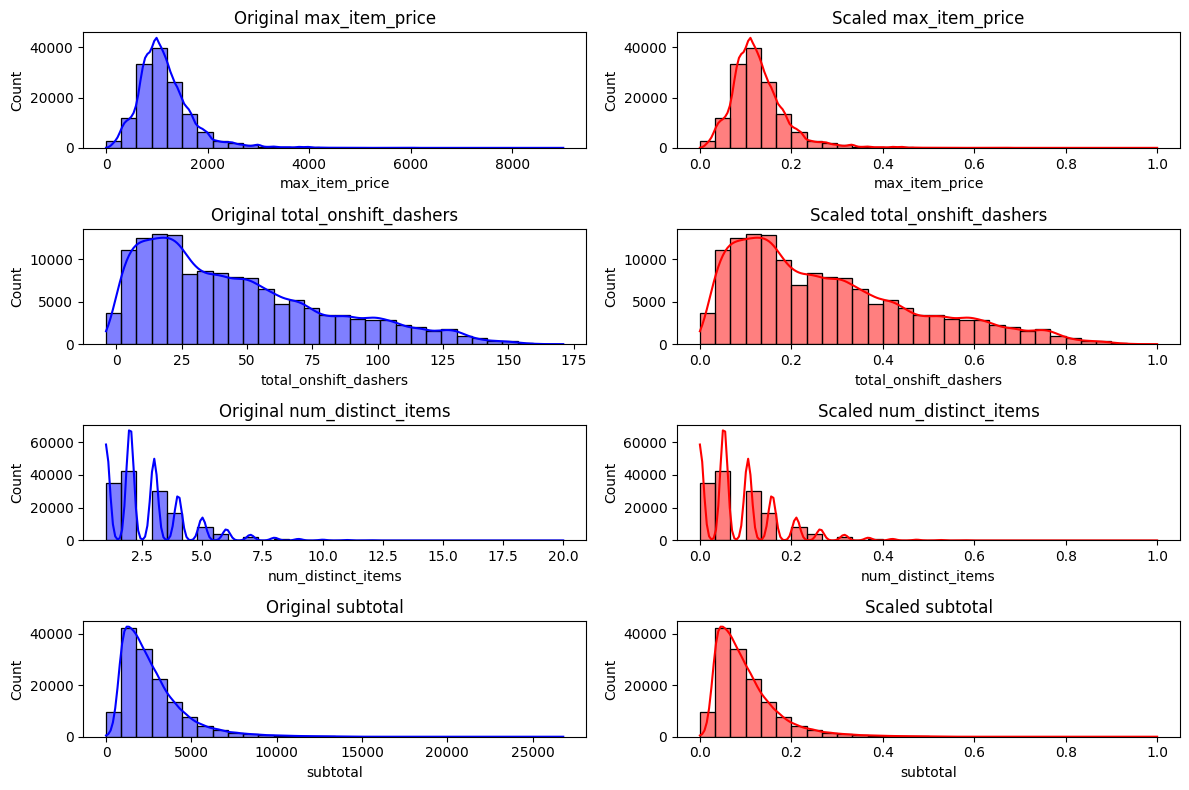

In [49]:
# Compare the scaled vs unscaled features used in the final model

numerical_cols = list(set(numerical_cols) - set(['min_item_price', 'store_primary_category', 'market_id']))
ategorical_cols = list(set(categorical_cols) - set(['min_item_price', 'store_primary_category', 'market_id']))

# Select only numerical features used in the final model
selected_numerical_features = [col for col in numerical_cols if col in selected_features]

# Scale numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_numerical_features])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_numerical_features)

# Plot comparison of original vs. scaled features
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(len(selected_numerical_features), 2, 2*i + 1)
    sns.histplot(X_train[col], bins=30, kde=True, color="blue")
    plt.title(f"Original {col}")

    plt.subplot(len(selected_numerical_features), 2, 2*i + 2)
    sns.histplot(X_train_scaled_df[col], bins=30, kde=True, color="red")
    plt.title(f"Scaled {col}")

plt.tight_layout()
plt.show()



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [50]:
# Analyze the effect of a unit change in a feature, say 'total_items'

import statsmodels.api as sm

# Extract 'total_items' and add constant for intercept
X_total_items = sm.add_constant(X_test["total_items"])
y = y_test

# Fit Linear Regression
model = sm.OLS(y, X_total_items).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2225.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:24:18   Log-Likelihood:            -1.2741e+05
No. Observations:               35156   AIC:                         2.548e+05
Df Residuals:                   35154   BIC:                         2.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.2506      0.079    544.386      

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes! Based on our earlier definition, the categorical variables in the dataset are:

market_id
store_primary_category
order_protocol
isWeekend



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size=0.2 in train-test splitting refers to the proportion of the dataset allocated to the test set.

Explanation:
test_size=0.2 means 20% of the dataset will be used for testing.
The remaining 80% will be used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

In [52]:
# Compute correlation matrix
corr_matrix = X_train.join(y_train).corr()

# Sort correlations with target variable
correlation_with_target = corr_matrix["time_taken"].drop("time_taken").sort_values(key=abs, ascending=False)

# Display highest correlated feature
highest_corr_feature = correlation_with_target.idxmax()
highest_corr_value = correlation_with_target.max()

print(f"Feature with highest correlation: {highest_corr_feature} (Correlation: {highest_corr_value:.3f})")


Feature with highest correlation: distance (Correlation: 0.461)


**Answer:**
>Distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers in the dataset, I used a combination of visualization and statistical methods:

Boxplots → Visualize extreme values for minutes_diff and other numerical features.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Top 3 Features Affecting Delivery Time:
 total_outstanding_orders     
distance                     
total_onshift_dashers        
 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression: A Detailed Explanation
Linear Regression is one of the simplest and most widely used machine learning algorithms for predictive modeling. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line to the data.

1️⃣ Understanding the Equation of Linear Regression

Linear regression models the relationship between the input variables and the output using a linear equation:

For Simple Linear Regression (One Feature)
Y=β0+β1X+ϵ
Where:

Y = Dependent variable (target/output)
X = Independent variable (feature/input)
β0 = Intercept 
β1 = Slope 
ϵ = Error term (captures noise & unaccounted factors)

For Multiple Linear Regression (Multiple Features)
Y=β0+β1X1+β2X2+...+βnXn+ϵ


2️⃣ Assumptions of Linear Regression

For linear regression to be valid and effective, the following assumptions should hold:

Linearity → The relationship between independent and dependent variables is linear.
Independence → Observations are independent of each other (no correlation between errors).
Homoscedasticity → The variance of residuals (errors) is constant across all values of 
X
X.
Normality of Residuals → The residuals (errors) should be normally distributed.
No Multicollinearity → Independent variables should not be highly correlated with each other.
3️⃣ How Linear Regression Works (Step-by-Step)

Step 1: Compute the Cost Function
The goal of linear regression is to find the best-fitting line by minimizing the error between the predicted values and the actual values. The most commonly used cost function is Mean Squared Error (MSE):
Gradient Descent updates the coefficients using the following rule:
Step 2: Optimize the Model using Gradient Descent
Step 3: Train the Model
Step4:  Evaluating Model Performance





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Linear Regression is used to model the relationship between a dependent variable (Y) and independent variable(s) (X) by fitting a linear equation. The key difference between Simple and Multiple Linear Regression is the number of independent variables used to predict the outcome.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In Linear Regression, the cost function measures how well the model’s predicted values match the actual values. The goal is to find the best-fit line that minimizes the error between predictions and actual values.
A cost function quantifies the error in a model by calculating the difference between predicted ND ACTUAL values.

Squaring the differences ensures all errors are positive and penalizes large errors more heavily.

The lower the MSE, the better the model fits the data.
A high MSE means the model’s predictions are far from actual values.
​	
  (coefficients) that minimize the MSE.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
Overfitting vs. Underfitting

Feature	                        |Overfitting	                                           |Underfitting
Definition	                    |Model learns too much, including noise	                   |Model learns too little, missing patterns
Complexity	                    |Too complex (high-degree polynomial, deep networks)	       |Too simple (linear model for non-linear data)
Training Accuracy	            |Very high	                                               |Low
Test Accuracy	                |Low (model doesn’t generalize)	                           |Low (model fails to learn)
Cause	                        |Too many features, high complexity, memorizing noise	   |Too few features, too much regularization
Fix	                            |Simplify model, use regularization, increase data	       |Increase complexity, use more features, reduce regularization



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual is the difference between the actual value and the predicted value

1. Checking Linearity Assumption 
✅ Ideal case: Residuals are randomly scattered around zero (no pattern).

2. Detecting Homoscedasticity (Constant Variance)
✅ Ideal case: Residuals have constant spread across all values 

3. Identifying Outliers & Influential Points 
✅ Ideal case: No extreme residuals.

4. Checking Independence of Residuals
✅ Ideal case: No systematic pattern in residuals.